In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

In [12]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [16]:
print(x_test.shape)

(10000, 28, 28)


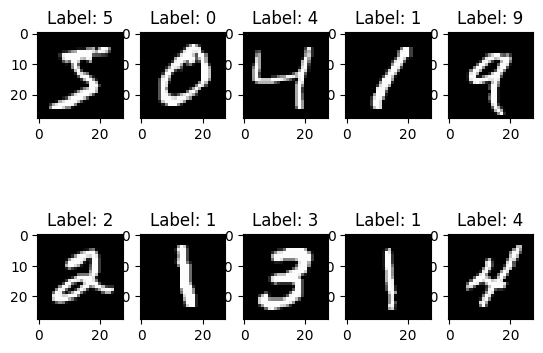

In [19]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.show()


###
🌟 Big Picture Analogy
1️⃣ Start with pages of numbers (28x28 images).
2️⃣ Flatten each page to a sentence (reshape).
3️⃣ Make words clearer by turning them into floats (astype).
4️⃣ Scale words down to be more consistent (divide by 255).
5️⃣ Now the model understands and can work with them easily!

In [21]:
x_train = x_train.reshape(-1,784).astype('float32')/255.0
x_test = x_test.reshape(-1,784).astype('float32')/255.0

In [22]:
y_train = tf.keras.utils.to_categorical(y_train,10) 
y_test = tf.keras.utils.to_categorical(y_test,10)

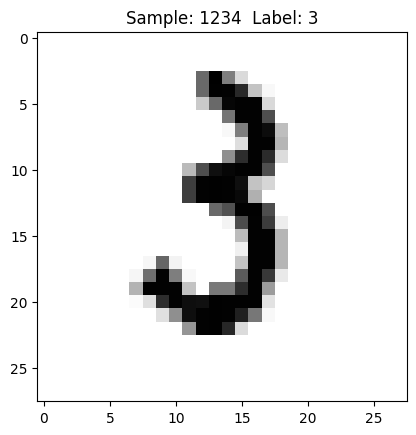

In [39]:
# Display a sample image
def display_sample(num):
    label = y_train[num].argmax()
    image = x_train[num].reshape([28, 28])
    plt.title(f'Sample: {num}  Label: {label}')
    plt.imshow(image, cmap='gray_r')
    plt.show()

display_sample(1234)

In [45]:
from tensorflow.keras import Input

input_images = Input(shape=(784,))
target_labels = Input(shape=(10,))

In [54]:
# Parameters for testing
hidden_nodes = 512  # You can test 256, 1024, etc.
learning_rate = 0.1  # Try 0.01, 0.001, 0.0001
batch_size = 100     # Try 50, 200, 500
epochs = 25

In [48]:
model = tf.keras.Sequential()

In [50]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(512, activation='relu')
])


In [51]:
use_second_layer = True
if use_second_layer:
    second_hidden_nodes = 256
    model.add(tf.keras.layers.Dense(second_hidden_nodes, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=50,
                     validation_data=(x_test, y_test))

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4609 - loss: 1.5513 - val_accuracy: 0.6474 - val_loss: 31.3154
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4753 - loss: 1.5264 - val_accuracy: 0.6430 - val_loss: 33.9731
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4743 - loss: 1.4976 - val_accuracy: 0.6579 - val_loss: 32.3990
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4797 - loss: 1.5114 - val_accuracy: 0.6523 - val_loss: 35.2506
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4941 - loss: 1.4679 - val_accuracy: 0.6625 - val_loss: 35.1100
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5198 - loss: 1.3916 - val_accuracy: 0.6642 - val_loss: 35.7250
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5286 - loss: 1.3749 - val_accuracy: 0.6768 - val_loss: 34.6182
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5463 - loss: 1.3110 - val_accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Some misclassified images:


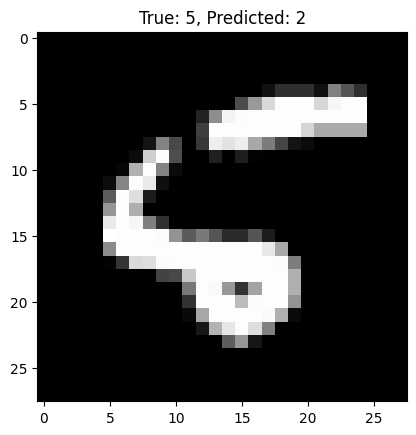

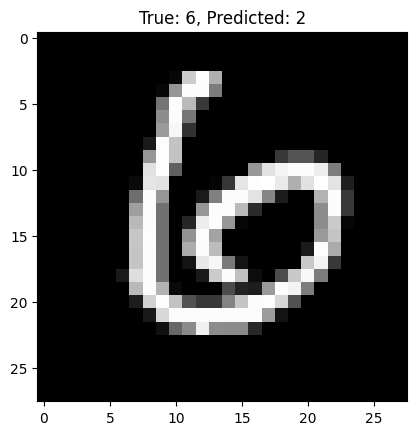

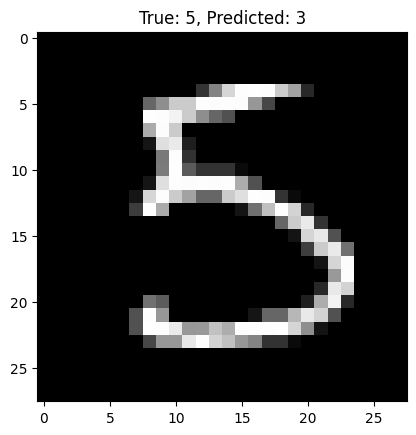

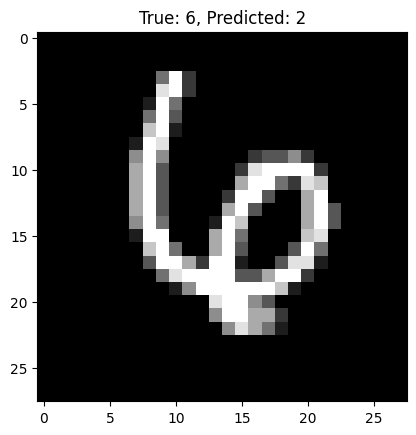

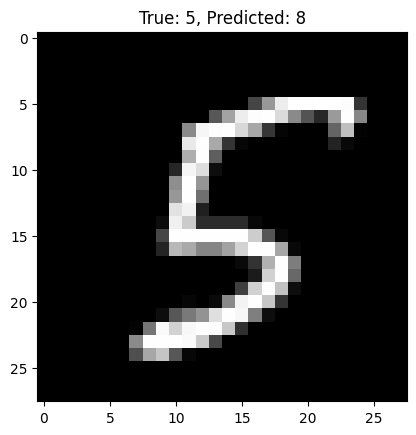

In [59]:
pred_labels = model.predict(x_test).argmax(axis=1)
true_labels = y_test.argmax(axis=1)
misclassified = np.where(pred_labels != true_labels)[0]

print("Some misclassified images:")
for i in misclassified[:5]:
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Predicted: {pred_labels[i]}")
    plt.show()


In [60]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_accuracy:.4f}")



Final Test Accuracy: 0.6903
